# **Examen #2 de Métodos computacionales 13-Feb-2024**

## **Instrucciones Generales:**  
- El examen consta de **3 puntos**, cada uno con el mismo valor.  
- **No está permitido** el uso de herramientas de inteligencia artificial para resolver los ejercicios.  
- Puede consultar únicamente la **documentación oficial, libros de texto, apuntes y recursos autorizados**.  
- Se valorará la **claridad, justificación de los procedimientos y el desarrollo completo** de las respuestas.  

**Tiempo total:** 2 horas

**Nota:** Cualquier indicio de uso de herramientas no permitidas será motivo de anulación del examen.  


In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from scipy.optimize import root_scalar
from scipy.interpolate import interp1d
from scipy.misc import derivative
from scipy.integrate import quad

Nota: el punto 2 lo completé en el horario del parcial. En el punto 3, completé la gráfica del ángulo vs el tiempo en el horario del parcial , el resto lo complete en ek tiempo de extensión dado, aunque el bonus no. En el punto 1, nada de lo que hice en el horario de parcial estaba correcto , por lo que la mayoría lo completé en el horario de extensión dado.

# 1.(33%) Péndulo
 I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$

In [124]:
def integral(phi, a):
  return 1 / np.sqrt(1-(np.sin(a/2)**2 * np.sin(phi)**2))

#tenía mal computada la función quad de scipy

def t_t0(a):
  sol, arg = quad(integral, 0, np.pi/2, args=(a,))
  return (2/np.pi) * sol

a = np.linspace(0, 90, 100)
a_rad = np.radians(a)

#forma compacta para calcular la razón para cada a

t_t0_res = [t_t0(a) for a in a_rad]

#dataframe

dataframe = pd.DataFrame({
    "Alpha (grados)" : a,
    "Alpha (radianes)" : a_rad,
    "T/T0" : t_t0_res
})

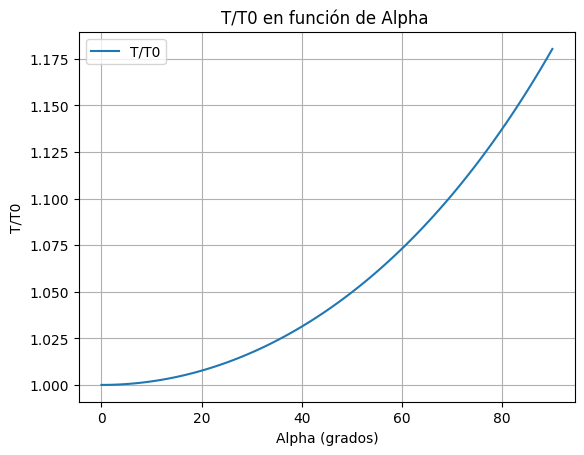

In [ ]:
plt.plot(dataframe['Alpha (grados)'], dataframe['T/T0'], label="T/T0")
plt.xlabel("Alpha (grados)")
plt.ylabel("T/T0")
plt.title("T/T0 en función de Alpha ")
plt.legend()
plt.grid()

Para $\alpha$ = 0 , el término en la integral se simplifica a 1, por lo cual la integral es igual a $\pi$/2. Así, T/T0 = 1

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






In [ ]:
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]

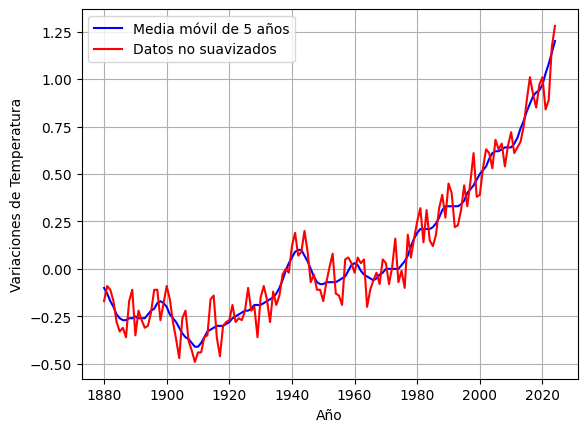

In [ ]:
plt.plot(data['Año'], data["Promedio_5"], color='blue', label='Media móvil de 5 años')
plt.xlabel("Año")
plt.ylabel("Variaciones de Temperatura")
plt.grid()
plt.plot(data["Año"], data["NoSauvizado"], color='red', label='Datos no suavizados')
plt.legend()
plt.show()

Análisis:
Del gráfico anterior, es posible concluir que las variaciones en tenmperatura han estado aumentando progresivamente con los años. Es decir, el promedio de la temperatura global sigue incrementando y, desde la gráfica, lo hace a mayor velocidad a partir del año 1960. Esto se debe, muy probablemente, al aumento en las emisiones de industrias pesadas a nivel global, que causan mucha contaminación, aumentando así la temperatura. Igualmente, el consumo desmedido de productos fabricados con plásticos u otros materiales que requieren la extracción de minerales o petróleo también han contribuído a este aumento progresivo de la temperatura.

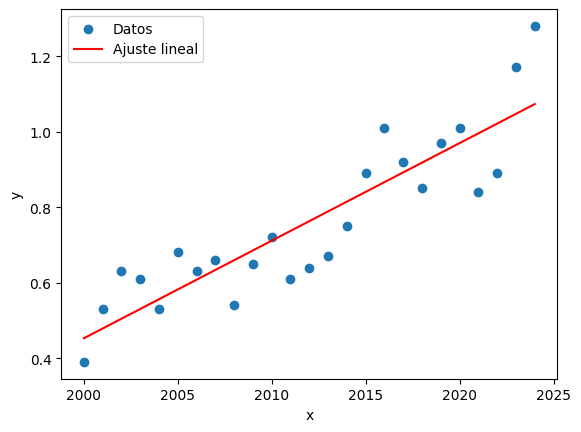

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

datafilter = data.loc[data["Año"]>1999]
# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = datafilter["Año"]
y = datafilter["NoSauvizado"]

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

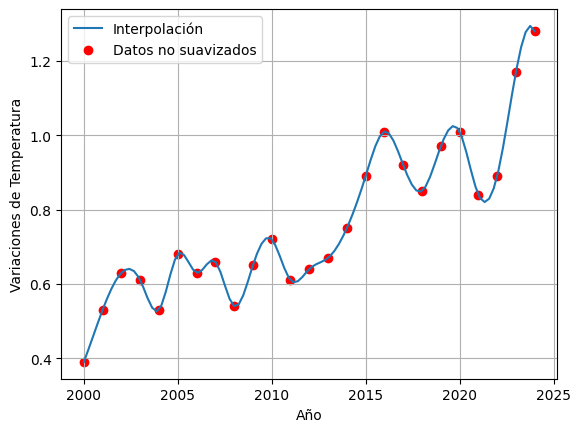

In [ ]:
interpolacion = interp1d(x, y, 'cubic')
x_new = np.linspace(2000,2024,100)
y_new = interpolacion(x_new)

plt.plot(x_new, y_new, label='Interpolación')
plt.scatter(x, y, color='red', label='Datos no suavizados')
plt.xlabel("Año")
plt.ylabel("Variaciones de Temperatura")
plt.grid()
plt.legend()
plt.show()

¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

Como podemos observar, la interpolación realizada es, de hecho, muy parecida al comportamiento real de los datos, ya que no difiere mucho de ellos incluso fuera de los puntos interpolados, Por otra parte, el modelo de ajuste lineal no es muy bueno, ya que muchos de los datos caen fuera de la curva de ajuste. Por ello, es más conveniente realizar una interpolación.

¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta

Extrapolando los datos con la misma función usada para la interpolación podría ser una buena estrategia, ya que esta se ajusta bien al comportamiento y la tendencia de los datos fuera de los puntos interpolados. De esta forma, podría usarse dicha función para predecir el incremento en la temperatura para 2030.

# 3. Derivación numérica

En el siguiente link ([datos_pendulo](https://github.com/hernansalinas/Curso_Metodos_Computacionales/tree/main/Entregas/Parciales/Parcial2/dataset)), se encuentran  datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa [kinovea](https://www.kinovea.org/). Dados los datos en formato csv,  construir un programa que realice lo siguiente:

- a. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

- b. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?

- c. Realice un gráfico de la rapidez angular como funcion del tiempo medio.$\frac{\mathrm{d}\theta}{\mathrm{d}t}$

- d. realice un grafico de la  aceleración angular como funcion del tiempo medio  $\frac{\mathrm{d^2}\theta}{\mathrm{d}t^2}$

Bonus

Calcule la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```python
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación.

- Encuentre el valor máximo de frecuencia

In [ ]:
url="https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/refs/heads/main/Entregas/Parciales/Parcial2/dataset/Pendulo_simple.csv"
df = pd.read_csv(url, sep=';', decimal=',', skiprows=1)
df.columns = ["Tiempo[ms]", "AnguloDeg"]

In [ ]:
df['AnguloDeg']

,AnguloDeg
0,59.982327
1,61.237453
2,63.004925
3,65.388771
4,68.413666
...,...
2841,94.937576
2842,96.479851
2843,97.940689
2844,99.318092


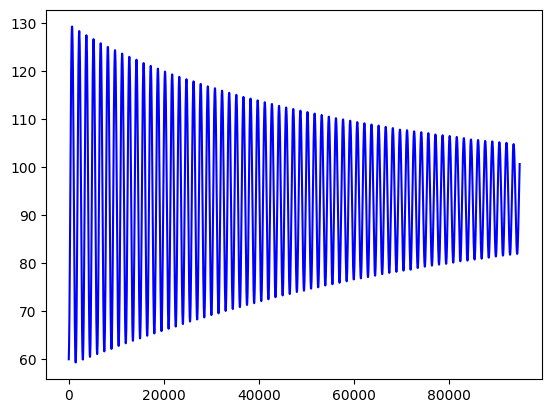

In [ ]:
df["AnguloRad"] = df["AnguloDeg"].astype(float).apply(np.radians)

plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

El movimiento del péndulo indica que, con el tiempo, su ángulo de apertura disminuye, posiblemente debido al efecto de la resistencia del aire.

In [ ]:
#la derivada se puede calcular con el gradiente, función de numpy

df['RapidezAngular'] = np.gradient(df['AnguloRad'],df['Tiempo[ms]'])

df['AceleracionAngular'] = np.gradient(df['RapidezAngular'],df['Tiempo[ms]'])

<ipython-input-118-87cab5830922>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
<ipython-input-118-87cab5830922>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


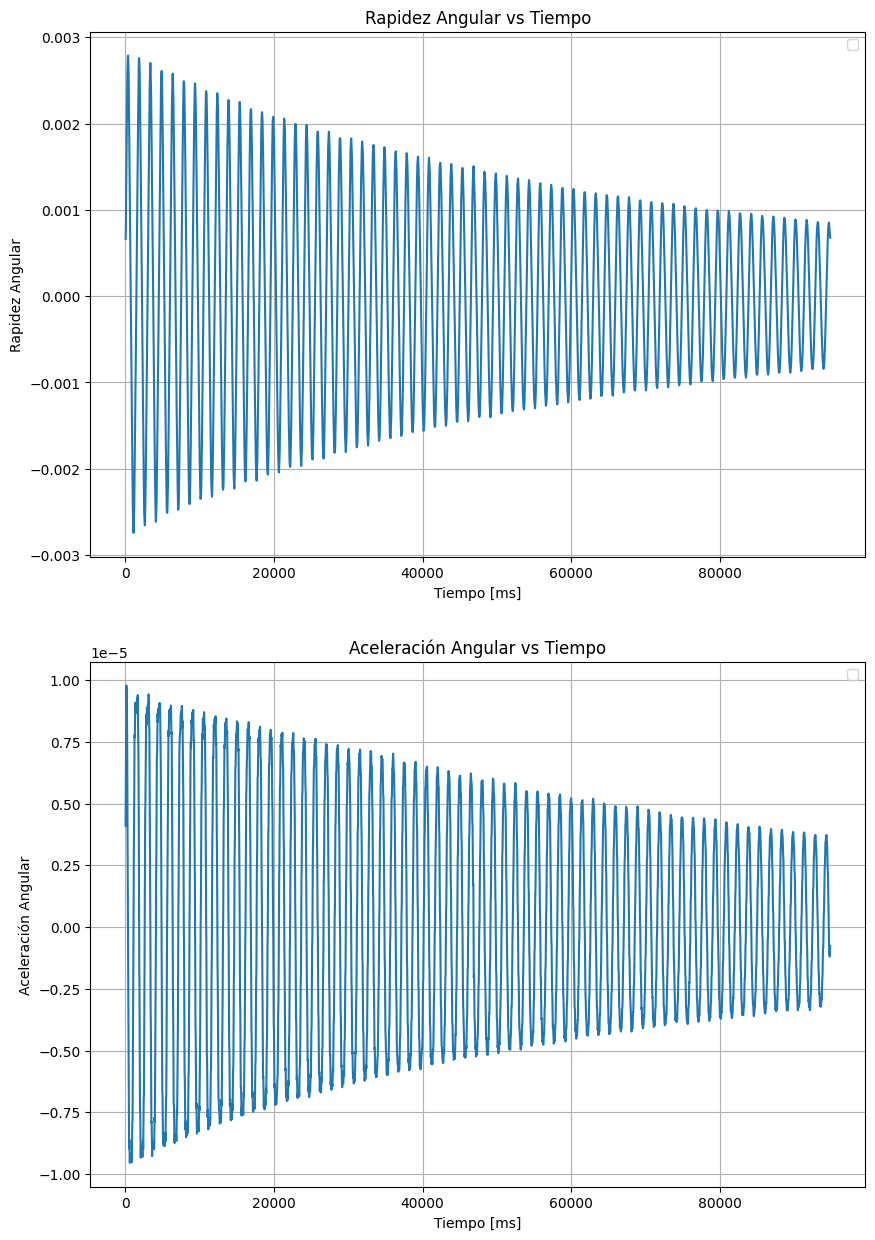

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(10,15))

#gráfica de la velocidad

axs[0].plot(df['Tiempo[ms]'],df['RapidezAngular'])
axs[0].set_title("Rapidez Angular vs Tiempo")
axs[0].set_xlabel("Tiempo [ms]")
axs[0].set_ylabel("Rapidez Angular")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(df['Tiempo[ms]'],df['AceleracionAngular'])
axs[1].set_title("Aceleración Angular vs Tiempo")
axs[1].set_xlabel("Tiempo [ms]")
axs[1].set_ylabel("Aceleración Angular")
axs[1].grid(True)
axs[1].legend()

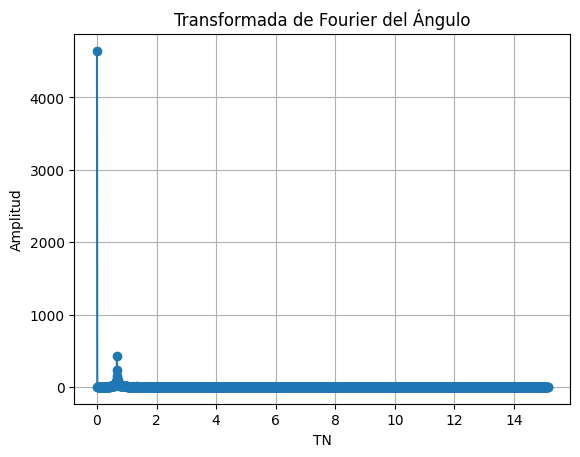

In [123]:
from scipy.fft import fft, fftfreq

ff = fft(df['AnguloRad'].values)
N = len(df['Tiempo[ms]'])
T = 33e-3
freq = fftfreq(N, T)[:N//2]

plt.plot(freq[:N//2], np.abs(ff[:N//2]), "o-")
plt.xlabel('TN')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier del Ángulo')
plt.grid(True)
plt.show()

#no entendí como interpolar en este caso